nose_tip coordinates [(790, 458), (792, 458), (794, 458), (797, 457), (799, 456)]
nose_bridge coordinates [(792, 444), (792, 446), (792, 448), (792, 451)]
Added_horizontal_distance 3
region(left,upper,right,lower) (787, 444, 802, 459)
pic_size (15, 15)
original nose pic size (396, 400)
nose (15, 15)
nose_tip coordinates [(297, 366), (299, 366), (301, 367), (303, 366), (305, 366)]
nose_bridge coordinates [(302, 353), (302, 356), (302, 359), (302, 362)]
Added_horizontal_distance 2
region(left,upper,right,lower) (295, 356, 307, 368)
pic_size (12, 12)
original nose pic size (15, 15)
nose (12, 12)
nose_tip coordinates [(706, 477), (708, 478), (711, 479), (713, 478), (715, 478)]
nose_bridge coordinates [(711, 463), (711, 467), (710, 471), (710, 475)]
Added_horizontal_distance 3
region(left,upper,right,lower) (703, 466, 718, 481)
pic_size (15, 15)
original nose pic size (12, 12)
nose (15, 15)
nose_tip coordinates [(452, 442), (454, 442), (457, 442), (459, 442), (461, 441)]
nose_bridge coordin

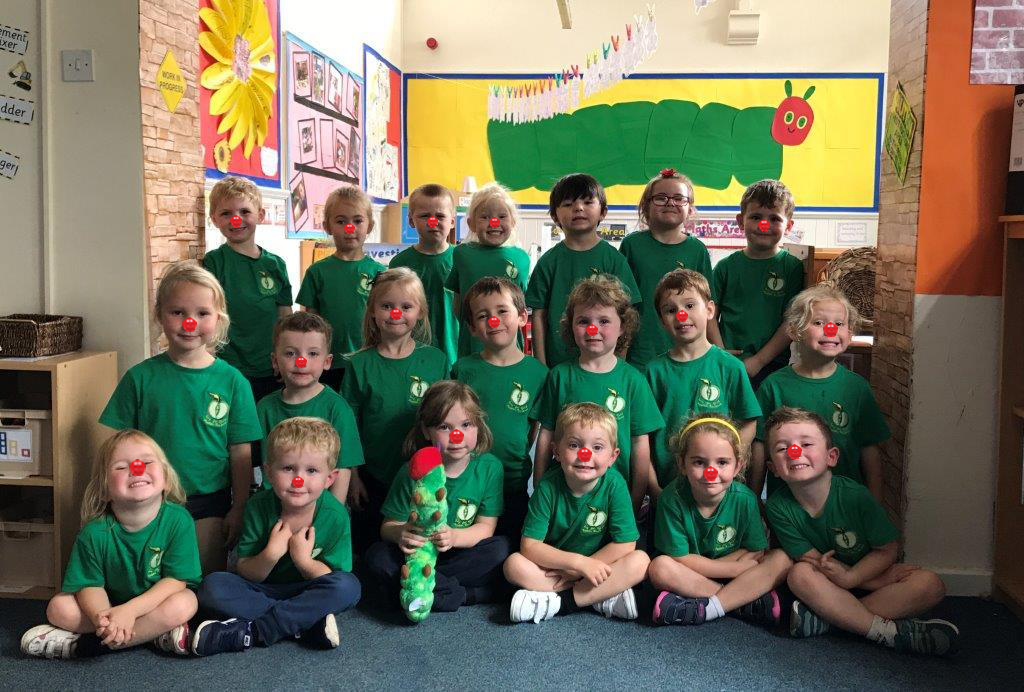

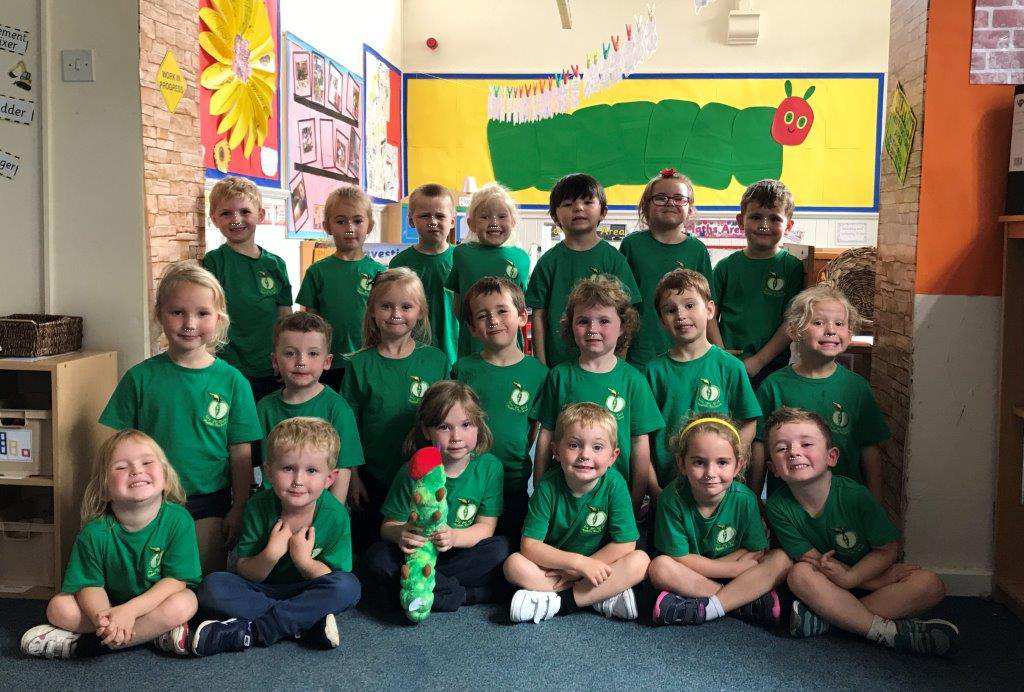

In [127]:
from PIL import Image, ImageDraw
import face_recognition
import math, cv2, numpy as np
from math import acos, degrees, sqrt
from IPython.display import HTML, display

# Load the jpg file into a numpy array
# Choose a picture 'richard_curtis.jpg' 'rihanna.jpg' 'ryan_gosling.jpg' 'arnie.jpg' 'drake.jpg' 'kim_kardashian' 'class_picture' 'family_picture2'
image = face_recognition.load_image_file("class_picture2.jpg")
# Choose a noise 'sniffer.png' 'sourcerer.png' 'teeth.png' 'viking.png' 'cook.png' 'djboogy.png' 'drnose.png' 'owl.png'
nose_pic = Image.open('teeth.png', mode='r')

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)
pil_image2 = Image.fromarray(image)

for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image2, 'RGBA')
    
    # Setting point to assess performance
    d.point(face_landmarks['nose_tip'], fill=None)
    d.point(face_landmarks['nose_bridge'], fill=None)
    
    print('nose_tip coordinates',face_landmarks['nose_tip'])
    print('nose_bridge coordinates',face_landmarks['nose_bridge'])

# Adjustment to region size
    Added_horizontal_distance = int((face_landmarks['nose_tip'][4][0] - face_landmarks['nose_tip'][0][0])*0.35)
    print('Added_horizontal_distance',Added_horizontal_distance )
    Added_vertical_distance = int((face_landmarks['nose_bridge'][3][1] - face_landmarks['nose_bridge'][0][1])*0.20)

# left part of the nose tip, adding -5 as the picture of the nose is smaller than picture size
    left = face_landmarks['nose_tip'][0][0] - Added_horizontal_distance
# right part of the nose tip, adding +5 as the picture of the nose is smaller than picture size
    right = face_landmarks['nose_tip'][4][0] + Added_horizontal_distance
# lower part of the nose bridge
    lower = face_landmarks['nose_tip'][2][1] +Added_vertical_distance
# upper part of the nose bridge, based on lower ground as nose picture is a square
    upper = lower - (right-left)


    region = (left,upper,right,lower)
    print('region(left,upper,right,lower)', region)

#resizing nose_pic to fit region size

    new_w = right-left
    new_h = new_w
    print("pic_size",(new_w,new_h))

    print('original nose pic size', nose_pic.size)

    nose_pic = nose_pic.resize((new_w, new_h), Image.ANTIALIAS)
    test = nose_pic.size
    print('nose',test)

    '''
# Adjust pic to rotate with original picture
    A = lower = face_landmarks['nose_tip'][2][0] - face_landmarks['nose_bridge'][0][0]
    B = lower = face_landmarks['nose_tip'][2][1] - face_landmarks['nose_bridge'][0][1]
    C = sqrt(A**2 + B**2)
    degree = degrees(acos((B / C)))
    print('A, B, C, degree', A, B, C, degree)
    nose_pic = nose_pic.rotate(degree)
    '''

# Paste nose to picture
    pil_image.paste(nose_pic, box=region,mask=nose_pic )

pil_image.show()
pil_image2.show()


display(pil_image, pil_image2)
pil_image.save('pasted.png')